Clasificación con la regresión logística multinomial.

In [63]:
from matplotlib.pylab import multinomial
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargar datos del csv
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

df["NObeyesdad"] = df["NObeyesdad"].apply(lambda x: 1 if x == "NObeyesdad" else 0) 

# Verificar si hay valores nulos(NaN) en el dataset
print("\n¿Hay valores nulos en el dataset?")
print(df.isnull().sum())

df = df.dropna() # Eliminados los valores Nan

df.info()

bins = [0, 19, 25,30,70]  # Definimos los rangos de esperanza de vida
labels = ["Bajo peso", "peso normal", "sobrepeso","obesidad"]

df["IMC"] = pd.cut(df["NObeyesdad"], bins=bins, labels=labels)

# Convertir la variable categórica en valores numéricos usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'], drop_first=True)

#  Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=["IMC", "Weight", "Height"])
y = df_encoded["IMC"].loc[X.index]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar la Regresión Logística
log_reg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred = log_reg.predict(X_test)

# Generar el reporte de clasificación
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Contar cuántas veces aparece cada categoría en las predicciones
category_counts = pd.Series(y_pred).value_counts()

# Mostrar el conteo de cada categoría
print(category_counts)

# Mostrar el reporte en la consola
print(classification_df)

# Mostrar la Matriz de Confusión
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Blues", ax=ax)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


¿Hay valores nulos en el dataset?
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null

ValueError: Input contains NaN

árbol de clasificación

In [51]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Cargar datos del csv
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#  Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=["IMC", "Weight", "Height"])
y = df_encoded["IMC"].loc[X.index]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
tree.plot_tree(model, filled=True, feature_names=df.feature_names, class_names=df.target_names) # La función plot_tree nos permite visualizar el árbol de decisión para ver cómo el modelo toma decisiones en función de las características. filled=True colorea los nodos para distinguir mejor las clases, feature_names asigna nombres a las características, class_name asigna nombres a las clases.


ValueError: Input contains NaN

**Regresión**

**Correlación**
Hacemos la correlacción para elegir las columnas que más se relacionen

In [56]:
correlaciones = df_encoded.corr()
correlaciones

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Age,1.000000,-0.025775,0.203451,0.017020,-0.043951,-0.045583,-0.145081,-0.296609,NaN,0.048682,...,-0.061705,0.091354,-0.116028,0.082789,-0.011464,-0.019939,0.003615,0.020212,-0.553166,-0.062937
Height,-0.025775,1.000000,0.462264,-0.038580,0.243387,0.213469,0.295354,0.051583,NaN,0.618145,...,-0.094613,0.055725,-0.133369,0.046101,0.106449,-0.127416,0.029012,-0.010419,-0.089820,0.036925
Weight,0.203451,0.462264,1.000000,0.216268,0.107413,0.200543,-0.051355,-0.071571,NaN,0.161665,...,-0.106259,0.025747,-0.201906,-0.041779,0.259599,-0.249828,-0.021745,-0.037300,0.059332,-0.100805
FCVC,0.017020,-0.038580,0.216268,1.000000,0.042045,0.068401,0.019936,-0.101221,NaN,-0.274425,...,-0.103837,0.014376,0.071835,-0.018678,0.082843,-0.077104,-0.029833,-0.007504,0.057917,0.014007
NCP,-0.043951,0.243387,0.107413,0.042045,1.000000,0.056936,0.129519,0.036404,NaN,0.067556,...,-0.146301,0.007806,-0.015615,-0.019065,0.099277,-0.092428,0.023309,0.003872,-0.056853,0.006493
CH2O,-0.045583,0.213469,0.200543,0.068401,0.056936,1.000000,0.167181,0.011924,NaN,0.107889,...,0.159037,-0.032003,0.008040,0.049417,0.062269,-0.083280,0.026135,-0.000951,0.037442,0.008317
FAF,-0.145081,0.295354,-0.051355,0.019936,0.129519,0.167181,1.000000,0.058586,NaN,0.189590,...,0.024358,0.011215,0.074273,0.054810,-0.136175,0.118688,0.067127,-0.016351,-0.048789,0.108921
TUE,-0.296609,0.051583,-0.071571,-0.101221,0.036404,0.011924,0.058586,1.000000,NaN,0.017290,...,-0.110863,0.017610,-0.010927,0.060961,-0.102872,0.079757,-0.021724,-0.067402,0.143600,0.073406
IMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Male,0.048682,0.618145,0.161665,-0.274425,0.067556,0.107889,0.189590,0.017290,NaN,1.000000,...,0.062930,0.044698,-0.102633,0.034848,-0.037694,0.024163,0.057001,0.045203,-0.160184,0.039317


Regresión Lineal Simple

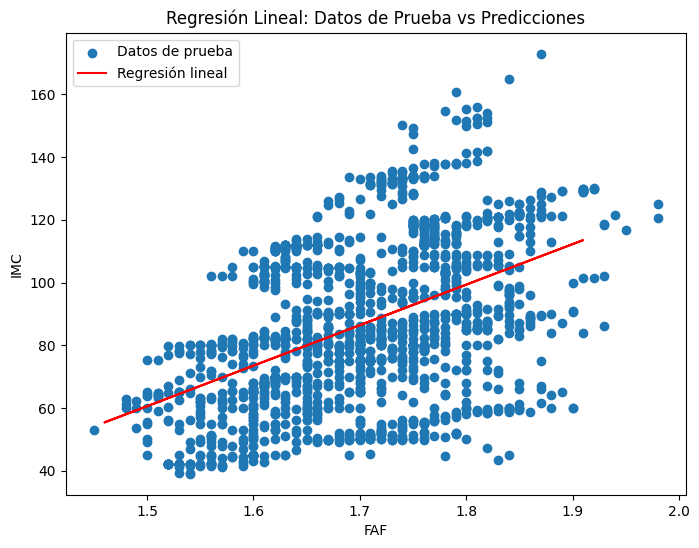

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Extraer las variables de interés
X = df["Height"].values.reshape(-1, 1)  # Variable independiente
y = df["Weight"].values  # Variable dependiente

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Datos de prueba")
plt.plot(X_test, y_pred, color="red", label="Regresión lineal")

# Personalizar el gráfico
plt.xlabel("FAF")
plt.ylabel("IMC")
plt.title("Regresión Lineal: Datos de Prueba vs Predicciones")
plt.legend()

# Mostrar el gráfico
plt.show()



Regresión Lineal Multiple

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir variables independientes (X) y dependiente (Y)
X = df[['Age', 'Height']]
y = df['Weight']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Coeficientes: {np.round(model.coef_, 4)}')
print(f'Intercepto: {round(model.intercept_, 4)}')
print(f'Error absoluto medio (MAE): {mae:.2f}')
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R²): {r2:.4f}')


Coeficientes: [  0.8535 130.4138]
Intercepto: -156.1757
Error absoluto medio (MAE): 18.72
Error cuadrático medio (MSE): 517.71
Coeficiente de determinación (R²): 0.2658


árbol de regresión

Mean Squared Error (MSE): 483.42


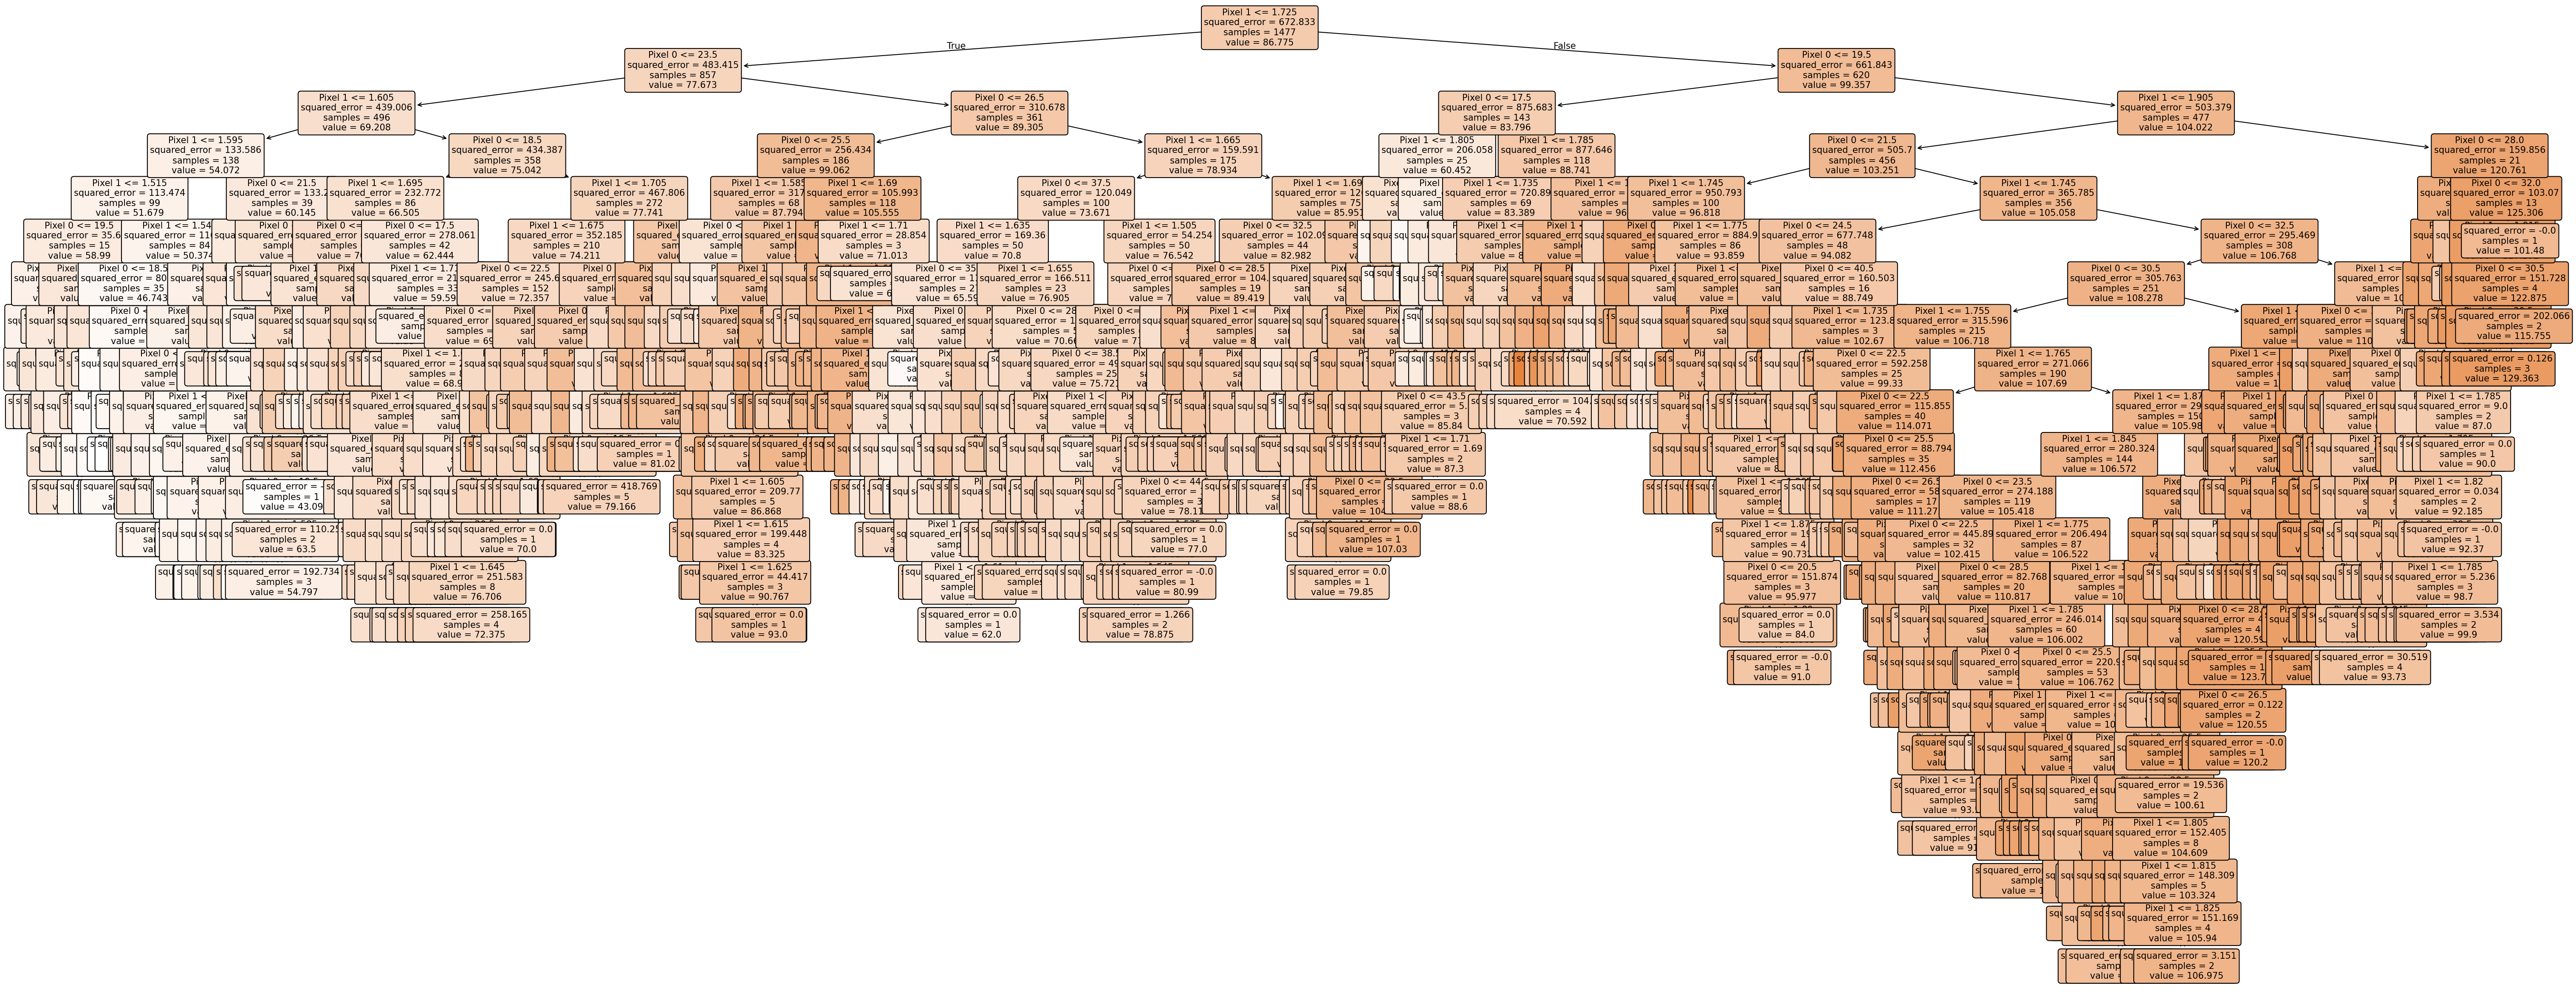

In [64]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

# Definir variables independientes (X) y dependiente (Y)
X = df[['Age', 'Height']]
y = df['Weight']

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Visualizar el árbol de decisión
plt.figure(figsize=(50, 20), dpi=150)  # Ajuste de dpi para mejorar la resolución
tree.plot_tree(
    model, 
    filled=True, 
    feature_names=[f'Pixel {i}' for i in range(X.shape[1])], 
    class_names=[str(i) for i in range(10)],
    fontsize=10,  # Reducir el tamaño de fuente para mejor legibilidad
    rounded=True,  # Bordes redondeados para mayor claridad
    proportion=False  # Evitar que los nodos se expandan demasiado
)
plt.show()
